In [32]:
import pandas as pd
import numpy as np


In [33]:
df=pd.read_csv("customer_churn_dataset-training-master.csv")
df.size

5289996

In [34]:
df=df.dropna()
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [35]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [36]:
for i in df.columns:
    print(i)
    print(df[i].unique())

CustomerID
[2.00000e+00 3.00000e+00 4.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]
Age
[30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]
Gender
['Female' 'Male']
Tenure
[39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]
Usage Frequency
[14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10.]
Support Calls
[ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8.]
Payment Delay
[18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19.]
Subscription Type
['Standard' 'Basic' 'Premium']
Contract Length
['Annual' 'Monthly' 'Quarter

In [37]:
df=df.drop(columns="CustomerID")

In [38]:
colms=['Gender','Subscription Type','Contract Length']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in colms:
    df[col] = le.fit_transform(df[col])

print(df[colms].head())

   Gender  Subscription Type  Contract Length
0       0                  2                0
1       0                  0                1
2       0                  0                2
3       1                  2                1
4       1                  0                1


In [39]:
df.head(2)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0


In [40]:
X=df.drop(columns="Churn")
y=df["Churn"]

In [41]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [42]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini')
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy')

In [43]:

clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

# 3. OUTPUTTING THE LOGIC
print(f"Gini-based Decision Tree Depth: {clf_gini.get_depth()}")
print(f"Entropy-based Decision Tree Depth: {clf_entropy.get_depth()}")

Gini-based Decision Tree Depth: 17
Entropy-based Decision Tree Depth: 17


In [44]:
ypred_gini=clf_gini.predict(X_test)
ypred_entropy=clf_entropy.predict(X_test)


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred_gini)


0.9998298683180782

In [46]:
accuracy_score(y_test,ypred_entropy)

0.9998865788787188

In [49]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt


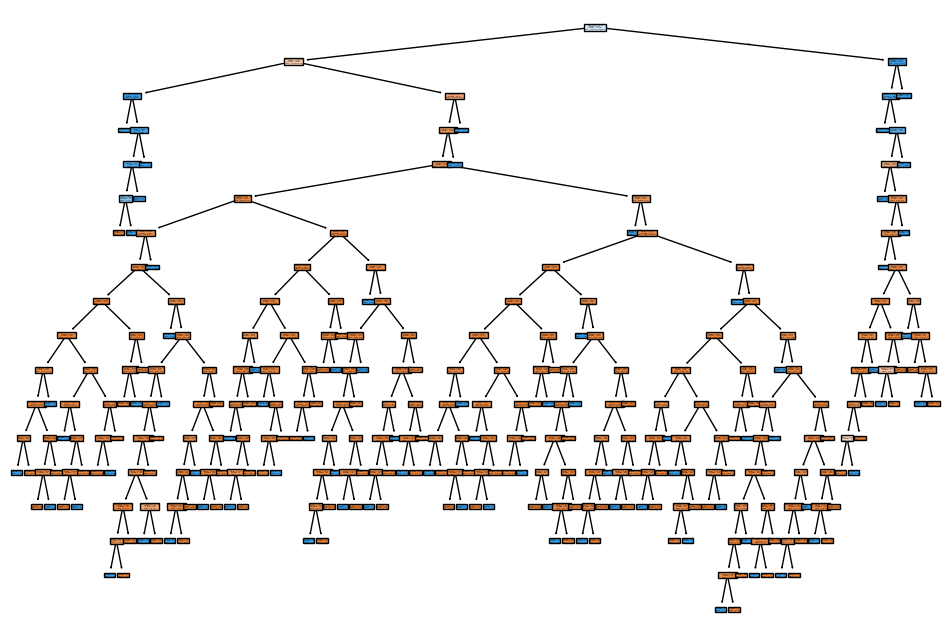

In [51]:

plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, feature_names=X_train.columns, filled=True)
plt.show()
